In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import sys
import os

py_file_location = "/content/drive/My Drive/Colab Notebooks/Summer24Notebooks/forAnalysis"
sys.path.append(os.path.abspath(py_file_location))
os.chdir(py_file_location)
!ls

 5-26-23_T2_behavior.xls
 Daphnia_Behavior_Analysis_Cuvette-Sleap.ipynb
'Daphnia_Behavior_Calculator - Sleap.ipynb'
'Daphnia_Behavior_Calculator - Sleap - Multianimal - tracking.ipynb'
 Figure1c.ipynb
 FreeSwimVid6.6.24_T1_behavior.xls
 FreeSwimVid_behavior.xls
 FreeSwimVid.h5
 functions.py
 functionsSleap.py
 functions_SLEAP.py
 msd_rectangle_impenetrable.xlsx
 __pycache__
'Sleap Analysis.ipynb'
 sleapResources.py


In [5]:
import matplotlib.pyplot as plt
import functions
import numpy as np
import pandas as pd

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [ ]:
names = [r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 18/T1/May 18_T1_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 18/T2/May 18_T2_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 18/T3/May 18_T3_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 18/T4/May 18_T4_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 18/T5/May 18_T5_behavior.xls",

        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 22/T1/May 22_T1_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 22/T2/May 22_T2_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 22/T3/May 22_T3_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/May 22/T4/May 22_T4_behavior.xls",

        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT1/6.16.23D20uM_T1_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT2/6.16.23D20uM_T2_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT3/6.16.23D20uM_T3_behavior.xls",

        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT7/6.16.23D20uM_T7_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT8/6.16.23D20uM_T8_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT9/6.16.23D20uM_T9_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT10/6.16.23D20uM_T10_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT11/6.16.23D20uM_T11_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6.16.23D20uM/6.16.23DT12/6.16.23D20uM_T12_behavior.xls",



        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6-20-23D20uM/6.20.23DT1/6-20-23D20uM_T1_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6-20-23D20uM/6.20.23DT2/6-20-23D20uM_T2_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6-20-23D20uM/6.20.23DT3/6-20-23D20uM_T3_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6-20-23D20uM/6.20.23DT4/6-20-23D20uM_T4_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6-20-23D20uM/6.20.23DT5/6-20-23D20uM_T5_behavior.xls",
        r"/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/20 uM/6-20-23D20uM/6.20.23DT6/6-20-23D20uM_T6_behavior.xls"

        ]

red   = Hopping and Sinking
green = Zoomin and Drifting
blue  = Hovering
There are a total of  80  Power Strokes. Out of these there are  35  Hops, and  33  Zooms and  12  Hoverings.
There are a total of  81  Post Power Strokes. Out of these there are  23  Sinks, and  22  Drifts and 36  Hovering.
True
There are a total of  79  Power Strokes. Out of these there are  20  Hops, and  44  Zooms and  15  Hoverings.
There are a total of  80  Post Power Strokes. Out of these there are  28  Sinks, and  31  Drifts and 21  Hovering.
True
There are a total of  58  Power Strokes. Out of these there are  16  Hops, and  24  Zooms and  18  Hoverings.
There are a total of  59  Post Power Strokes. Out of these there are  12  Sinks, and  24  Drifts and 23  Hovering.
True
There are a total of  59  Power Strokes. Out of these there are  20  Hops, and  34  Zooms and  5  Hoverings.
There are a total of  60  Post Power Strokes. Out of these there are  20  Sinks, and  20  Drifts and 20  Hovering.
True
There ar

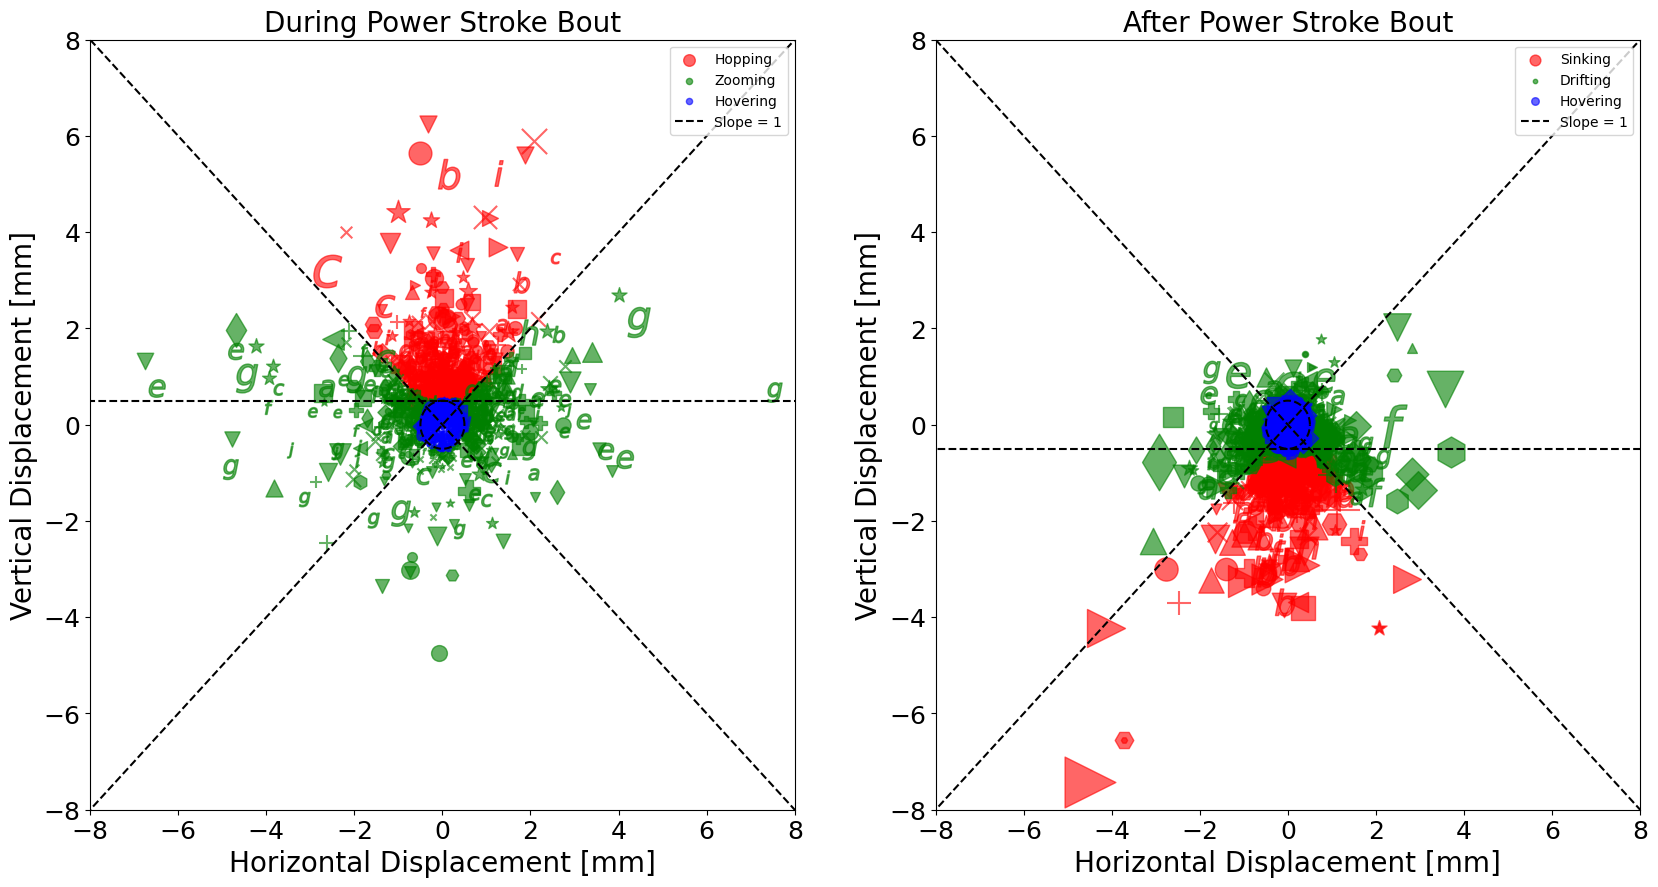

In [ ]:
minHopSlope = 1 # Minimum Slope for it to count as Hopping
minHopDist = 0.5 #Minimum Distance it needs to travel for it to count as a Hop

minSinkSlope = 1 #Minimum Slope for it to count as Sinking
minSinkDist = -0.5 #Minimum Vertical Distance for it to count as Sinking

Radius = 0.5

Lim = 100 #the windowsize

Size = [0, 1150]
show_all_graphs = [True, True, True]

all_hopfrac20mm1hr, all_sinkfrac20mm1hr, all_hoverfrac20mm1hr, all_zoomfrac20mm1hr, all_driftfrac20mm1hr, all_hoverfrac2_20mm1hr, all_hopping, all_sinking, all_drifting, all_zooming, all_hovering, all_hovering2, all_number_of_ps, all_ppslength, all_pslengthframes, all_pslength, all_hopping_NGDR, all_zooming_NGDR, all_hovering_NGDR, all_sinking_NGDR, all_drifting_NGDR, all_hovering2_NGDR,Eccentricity = functions.Results_sleap(names, minHopSlope, minHopDist, minSinkSlope, minSinkDist, Radius, Lim, Size, show_all_graphs)

In [ ]:
#The control Group
control = [
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T1/7-1_trial1_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T2/7-1_trial2_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T3/7-1_trial3_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T4/7-1_trial4_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T5/7-1_trial5_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T6/7-1_trial6_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T7/7-1_trial7_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T8/7-1_trial8_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T10/7-1_trial10_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T11/7-1_trial11_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T12/7-1_trial12_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/7_1/T13/7-1_trial13_behavior.xls",

        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T1/6-23_trial1_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T2/6-23_trial2_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T3/6-23_trial3_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T4/6-23_trial4_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T5/6-23_trial5_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T6/6-23_trial6_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T7/6-23_trial7_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T8/6-23_trial8_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T9/6-23_trial9_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T10/6-23_trial10_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T11/6-23_trial11_behavior.xls",
        "/Users/andy/Dasgupta Dropbox/Moumita Dasgupta/PC/Documents/Daphnia Research/Research/Summer Research 2023/Free_swimming/Control/6_23/T12/6-23_trial12_behavior.xls"]

red   = Hopping and Sinking
green = Zoomin and Drifting
blue  = Hovering
There are a total of  69  Power Strokes. Out of these there are  15  Hops, and  39  Zooms and  15  Hoverings.
There are a total of  69  Post Power Strokes. Out of these there are  19  Sinks, and  15  Drifts and 35  Hovering.
True
There are a total of  79  Power Strokes. Out of these there are  20  Hops, and  54  Zooms and  5  Hoverings.
There are a total of  79  Post Power Strokes. Out of these there are  27  Sinks, and  26  Drifts and 26  Hovering.
True
There are a total of  73  Power Strokes. Out of these there are  34  Hops, and  26  Zooms and  13  Hoverings.
There are a total of  73  Post Power Strokes. Out of these there are  39  Sinks, and  15  Drifts and 19  Hovering.
True
There are a total of  76  Power Strokes. Out of these there are  21  Hops, and  43  Zooms and  12  Hoverings.
There are a total of  76  Post Power Strokes. Out of these there are  21  Sinks, and  32  Drifts and 23  Hovering.
True
There ar

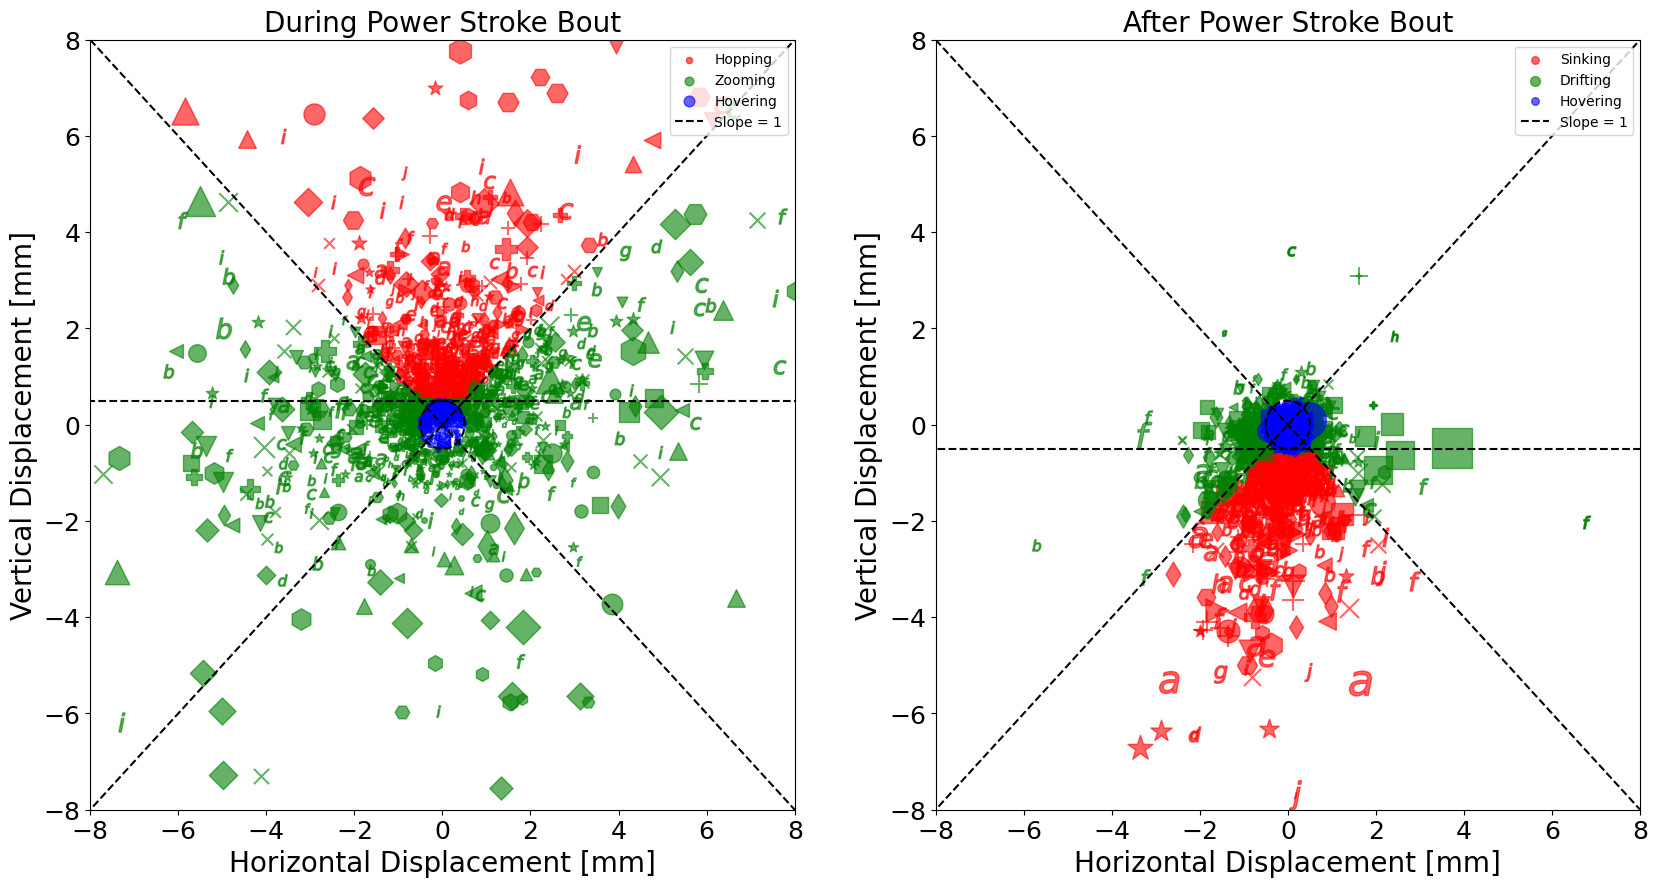

In [ ]:
minHopSlope = 1 # Minimum Slope for it to count as Hopping
minHopDist = 0.5 #Minimum Distance it needs to travel for it to count as a Hop

minSinkSlope = 1 #Minimum Slope for it to count as Sinking
minSinkDist = -0.5 #Minimum Vertical Distance for it to count as Sinking

Radius = 0.5

Lim = 100 #the windowsize

Size = [0, 100]

show_all_graphs = [True, True, True] #[speed, vertical, horizontal]

#Getting the Results for the Control Group
all_hopfrac, all_sinkfrac, all_hoverfrac, all_zoomfrac, all_driftfrac, all_hoverfrac2, all_hopping, all_sinking, all_drifting, all_zooming, all_hovering, all_hovering2, all_number_of_ps, all_ppslength, all_pslengthframes, all_pslength, all_hopping_NGDR, all_zooming_NGDR, all_hovering_NGDR, all_sinking_NGDR, all_drifting_NGDR, all_hovering2_NGDR, eccentricity = functions.Results(control, minHopSlope, minHopDist, minSinkSlope, minSinkDist, Radius, Lim, Size,show_all_graphs)



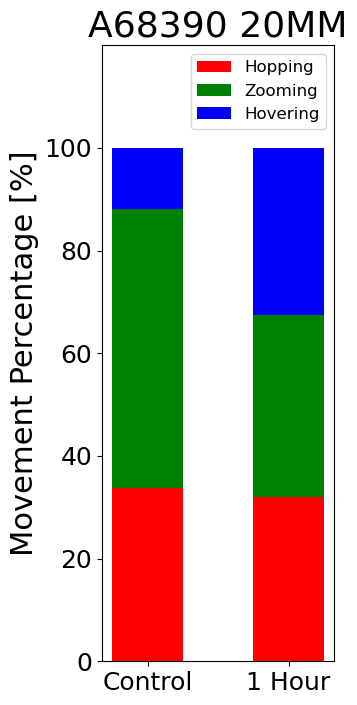

In [ ]:
labels = ['Control','1 Hour']
#labels = ['Control', '1 Hour', '2 Hour', '6 Hour']
#[all_hopfrac, all_hopfrac1mm1hr, all_hopfrac1mm2hr, all_hopfrac1mm6hr]
hopping = [np.mean(all_hopfrac),np.mean(all_hopfrac20mm1hr)]
zooming = [np.mean(all_zoomfrac),np.mean(all_zoomfrac20mm1hr)]
hovering = [np.mean(all_hoverfrac),np.mean(all_hoverfrac20mm1hr)]

#hopping = [np.mean(all_hopfrac20mm1hr)]
#zooming = [np.mean(all_zoomfrac20mm1hr)]
#hovering = [np.mean(all_hoverfrac20mm1hr)]

#hopping = [np.mean(all_hopfrac), np.mean(all_hopfrac1mm1hr), np.mean(all_hopfrac1mm2hr), np.mean(all_hopfrac1mm6hr)]
#zooming = [np.mean(all_zoomfrac), np.mean(all_zoomfrac1mm1hr), np.mean(all_zoomfrac1mm2hr), np.mean(all_zoomfrac1mm6hr)]
#hovering = [np.mean(all_hoverfrac), np.mean(all_hoverfrac1mm1hr), np.mean(all_hoverfrac1mm2hr), np.mean(all_hoverfrac1mm6hr)]


secondbottom = []
for i in range(0, len(hopping)):
    secondbottom.append(hopping[i] + zooming[i])

width = 0.5    # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(3,8))

ax.bar(labels, hopping, width, label='Hopping', color="red")
ax.bar(labels, zooming, width, bottom=hopping,label='Zooming', color="green")
ax.bar(labels, hovering, width, bottom=secondbottom,label='Hovering', color="blue")

ax.set_ylabel('Movement Percentage [%]', fontsize=22)
ax.set_title("A68390 20MM", fontsize=26)
ax.set_ylim(0, 1.2)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=18)


ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '20', '40','60', '80', '100'])
plt.show()


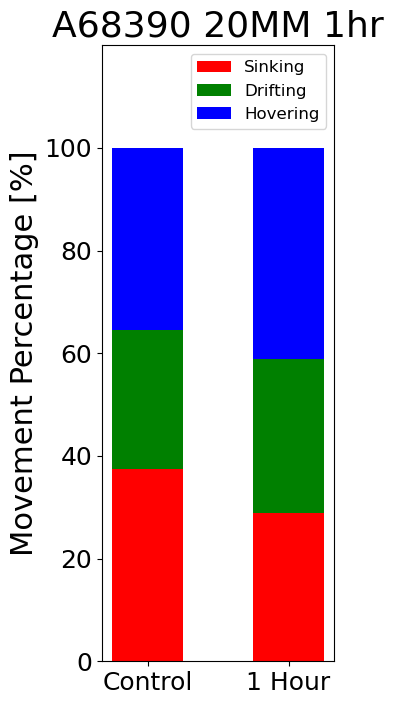

In [ ]:
labels = ['Control','1 Hour']
#labels = ['Control', '1 Hour', '2 Hour', '6 Hour']
#[all_hopfrac, all_hopfrac1mm1hr, all_hopfrac1mm2hr, all_hopfrac1mm6hr]
hopping = [np.mean(all_sinkfrac), np.mean(all_sinkfrac20mm1hr)]
zooming = [np.mean(all_driftfrac),np.mean(all_driftfrac20mm1hr)]
hovering = [np.mean(all_hoverfrac2), np.mean(all_hoverfrac2_20mm1hr)]


#hopping = [np.mean(all_sinkfrac), np.mean(all_sinkfrac01mm1hr), np.mean(all_sinkfrac01mm2hr), np.mean(all_sinkfrac01mm6hr)]
#zooming = [np.mean(all_driftfrac), np.mean(all_driftfrac01mm1hr), np.mean(all_driftfrac01mm2hr), np.mean(all_driftfrac01mm6hr)]
#hovering = [np.mean(all_hoverfrac2), np.mean(all_hoverfrac201mm1hr), np.mean(all_hoverfrac201mm2hr), np.mean(all_hoverfrac201mm6hr)]


secondbottom = []
for i in range(0, len(hopping)):
    secondbottom.append(hopping[i] + zooming[i])

width = 0.5     # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(3,8))

ax.bar(labels, hopping, width, label='Sinking', color='red')
ax.bar(labels, zooming, width, bottom=hopping,label='Drifting', color='green')
ax.bar(labels, hovering, width, bottom=secondbottom,label='Hovering', color='blue')

ax.set_ylabel('Movement Percentage [%]', fontsize=22)
ax.set_title("A68390 20MM 1hr", fontsize=26)
ax.set_ylim(0, 1.2)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=18)


ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '20', '40','60', '80', '100'])

plt.show()

In [ ]:
direction_diffusion_hopping, direction_diffusion_zooming, direction_diffusion_hovering, direction_diffusion_sinking, direction_diffusion_drifting, direction_diffusion_hovering2 = functions.DirectionalDiffusion(all_hopping, all_zooming, all_hovering, all_sinking, all_drifting, all_hovering2, names)

<built-in function all>


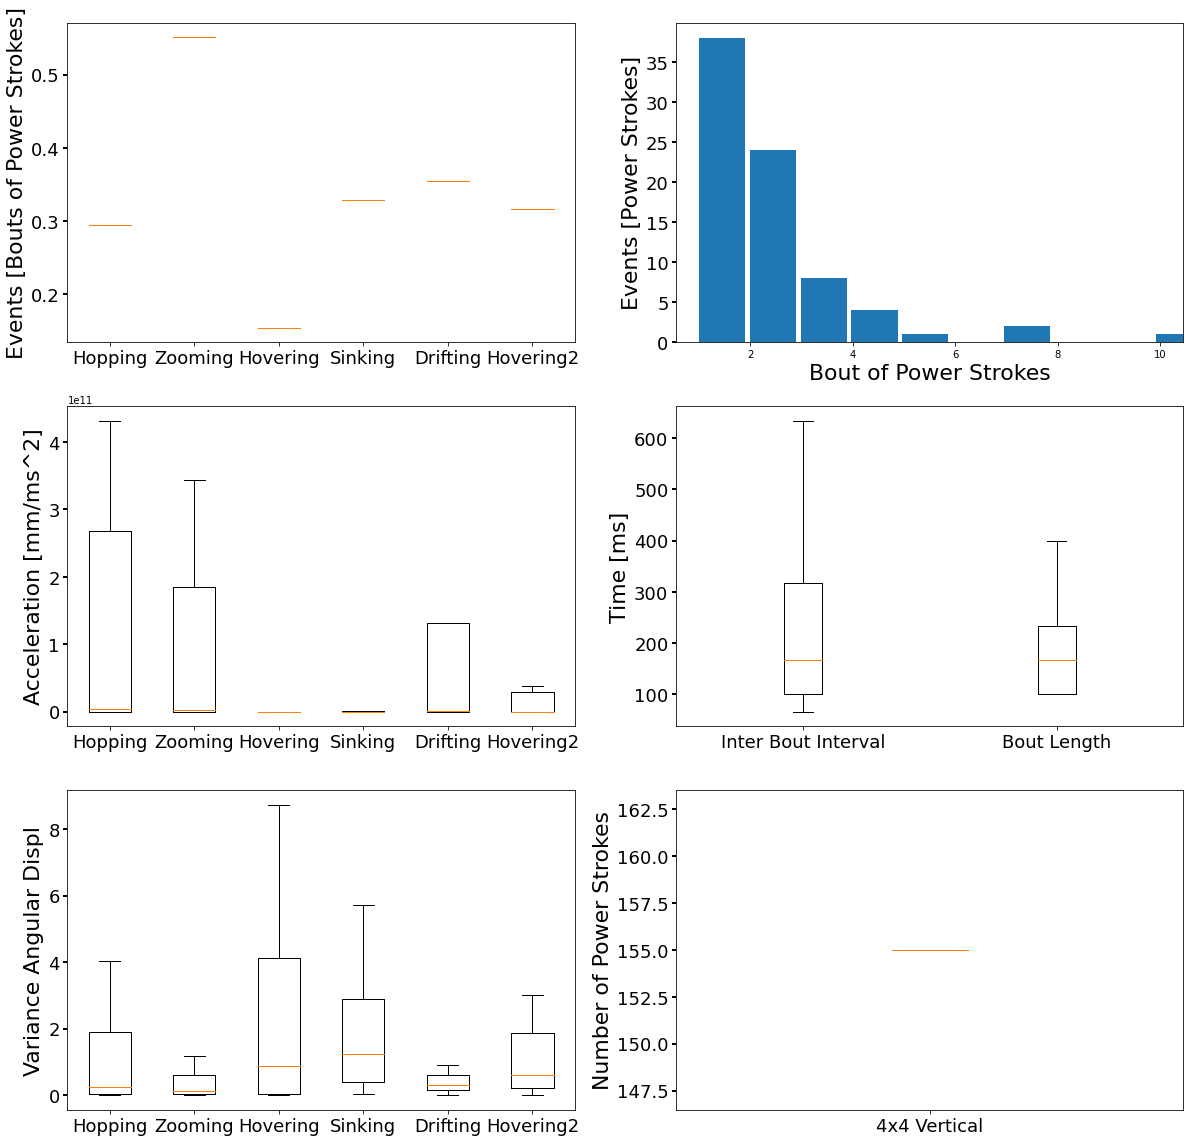

In [ ]:
fig, ([ax0, ax1], [ax2, ax3], [ax4, ax5]) = plt.subplots(3, 2, figsize=(20, 20))
print(all)
d = [all_hopfrac, all_zoomfrac, all_hoverfrac, all_sinkfrac, all_driftfrac, all_hoverfrac2]
ax0.boxplot(d, showfliers=False)
ax0.set_ylabel("Events [Bouts of Power Strokes]", fontsize=22)
ax0.set_xticklabels(["Hopping", "Zooming","Hovering", "Sinking", "Drifting", "Hovering2"], fontsize=18)
ax0.yaxis.set_tick_params(labelsize=18, width=2, length=4)

ax1.hist(all_pslength, bins=100, width=0.9)
ax1.set_xlabel("Bout of Power Strokes", fontsize=22)
ax1.set_ylabel("Events [Power Strokes]", fontsize=22)
ax1.yaxis.set_tick_params(labelsize=18, width=2, length=4)

d2 = [all_hopping_NGDR, all_zooming_NGDR, all_hovering_NGDR, all_sinking_NGDR, all_drifting_NGDR, all_hovering2_NGDR]
ax2.boxplot(d2, showfliers=False)
ax2.set_xticklabels(["Hopping","Zooming", "Hovering", "Sinking", "Drifting", "Hovering2"], fontsize=18)
ax2.set_ylabel("Acceleration [mm/ms^2]", fontsize=22)
ax2.yaxis.set_tick_params(labelsize=18, width=2, length=4)

d1 = [all_ppslength, all_pslengthframes]
ax3.boxplot(d1, showfliers=False)
ax3.set_xticklabels(["Inter Bout Interval", "Bout Length"], fontsize=18)
ax3.set_ylabel("Time [ms]", fontsize=22)
ax3.yaxis.set_tick_params(labelsize=18, width=2, length=4)


d3 = [ direction_diffusion_hopping, direction_diffusion_zooming, direction_diffusion_hovering,direction_diffusion_sinking, direction_diffusion_drifting, direction_diffusion_hovering2]
ax4.boxplot(d3, showfliers=False)
ax4.set_xticklabels(["Hopping","Zooming", "Hovering", "Sinking", "Drifting", "Hovering2"], fontsize=18)
ax4.set_ylabel("Variance Angular Displ", fontsize=22)
ax4.yaxis.set_tick_params(labelsize=18, width=2, length=4)

ax5.boxplot(all_number_of_ps)
ax5.set_xticklabels(["4x4 Vertical"], fontsize=18)
ax5.set_ylabel("Number of Power Strokes", fontsize=22)
ax5.yaxis.set_tick_params(labelsize=18, width=2, length=4)




plt.show()

In [ ]:
#functions.safeHZSDdata(all_hopping, all_zooming, all_sinking, all_drifting, 'alldata.xls');